Problem 18 from the advent of code calendar 2022.

January 2, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.set_printoptions(linewidth=250)

In [2]:
#Data copied from https://adventofcode.com/2022/day/18

data = np.array([[2,2,2],
[1,2,2],
[3,2,2],
[2,1,2],
[2,3,2],
[2,2,1],
[2,2,3],
[2,2,4],
[2,2,6],
[1,2,5],
[3,2,5],
[2,1,5],
[2,3,5]])


Using the examples from https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py to generate 3D plot of data to better understand what their problem will look like.

In [3]:
data[:,2]

array([2, 2, 2, 2, 2, 1, 3, 4, 6, 5, 5, 5, 5])

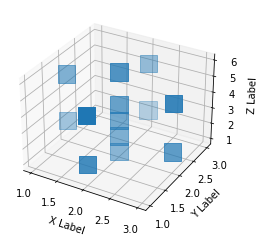

In [4]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = data[:,0]
ys = data[:,1]
zs = data[:,2]
ax.scatter(xs, ys, zs, s= 300, marker = 's')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



In [5]:
cdf = pd.read_csv('18.txt', header = None)
cdf.columns = ['x','y','z']

In [6]:
cdf.shape

(2176, 3)

In [7]:
cdf.head()

,x,y,z
0,10,16,14
1,16,8,8
2,6,15,11
3,7,15,3
4,3,11,9


In [8]:
cdf[(cdf.x == 1) & (cdf.y == 7) ].sort_values('z').diff().value_counts()

x    y    z  
0.0  0.0  1.0    3
dtype: int64

In [9]:
grouped = cdf.groupby(['x','y'])
zipdf = grouped.apply(lambda w: w.sort_values('z').diff().value_counts())
nz = zipdf.unstack()[1.0].sum()


In [10]:
grouped = cdf.groupby(['x','z'])
yipdf = grouped.apply(lambda w: w.sort_values('y').diff().value_counts())
ny = yipdf.reorder_levels([0,1,2,4,3]).unstack()[1.0].sum()


In [11]:
grouped = cdf.groupby(['y','z'])
xipdf = grouped.apply(lambda w: w.sort_values('x').diff().value_counts())
nx = xipdf.reorder_levels([0,1,3,4,2]).unstack()[1.0].sum()


In [12]:
6*cdf.shape[0] - 2*(nx + ny + nz)

3396.0

## Part !!

Because of course Part 1, was simply solved, part 2 is going to be a bit more annoying.  Part 1 was solved without any thought to extensibility.  Hence, now we have to make a different picture.

In [32]:
cdf.min()

x    0
y    0
z    0
dtype: int64

In [33]:
cell = np.zeros([20,20,20])

In [34]:
cdf.values

array([[10, 16, 14],
       [16,  8,  8],
       [ 6, 15, 11],
       ...,
       [13, 15,  3],
       [15, 17,  7],
       [15, 11, 13]])

In [35]:
for x,y,z in cdf.values:
    cell[x,y,z] = 1

In [40]:
for i in range(20):
    print(cell[i])
    print()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

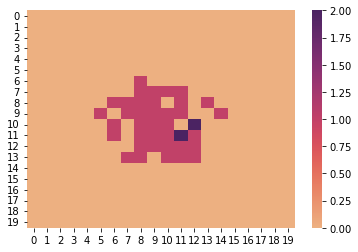

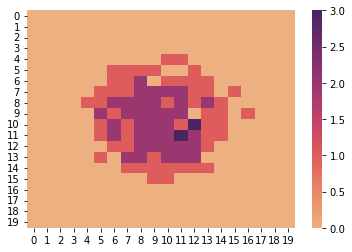

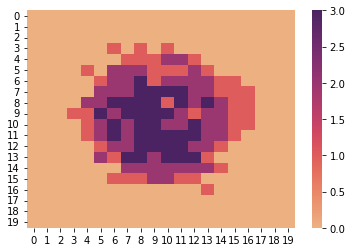

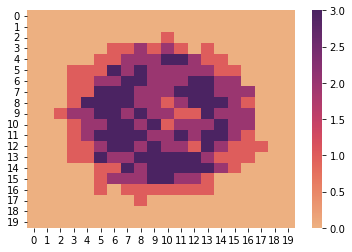

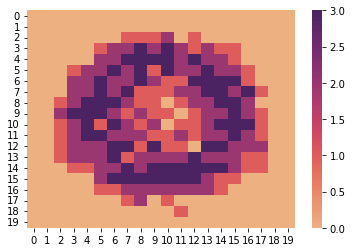

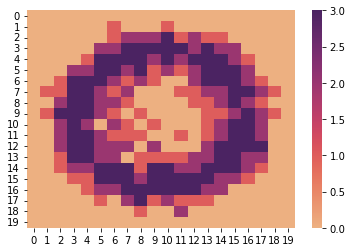

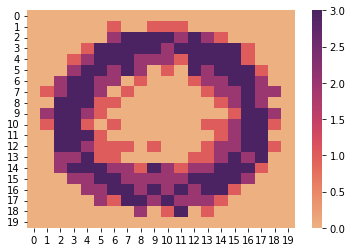

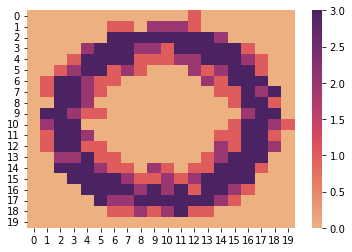

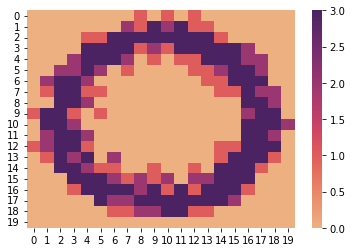

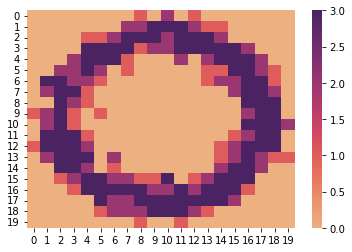

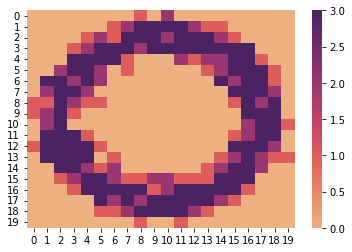

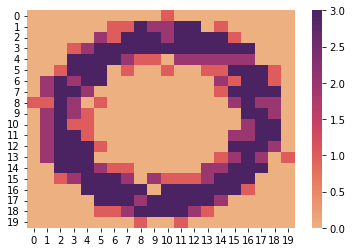

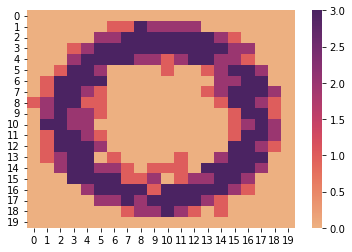

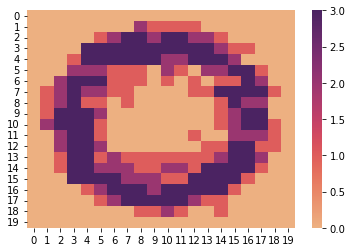

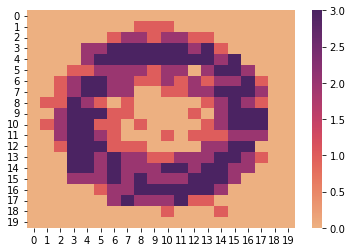

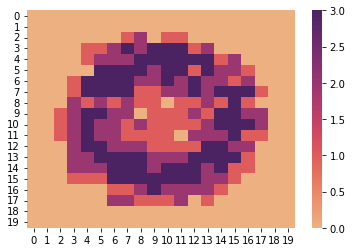

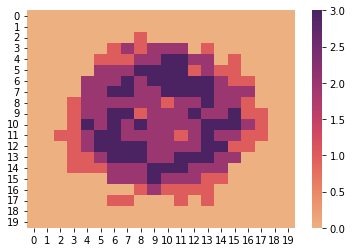

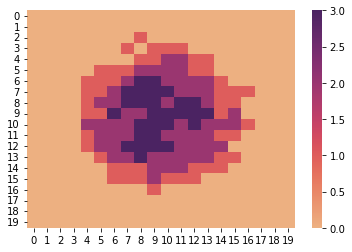

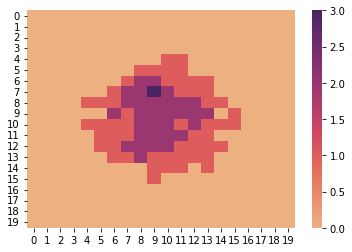

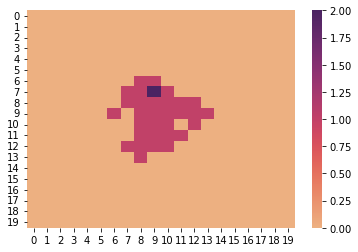

In [57]:
for i in range(20):
    sns.heatmap(cell[max(0,i-1):min(20,i+2)].sum(axis = 0),cbar = True, cmap = 'flare')
    plt.show()
    

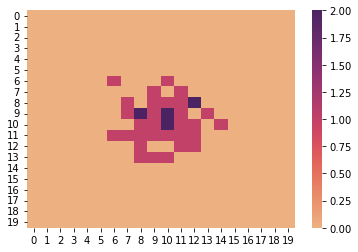

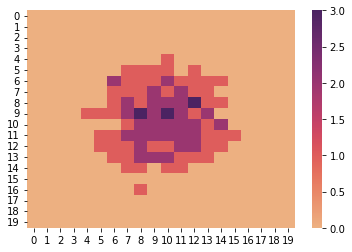

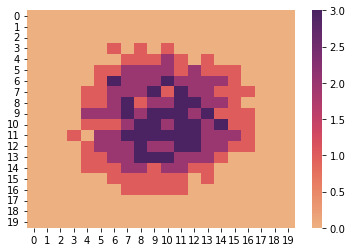

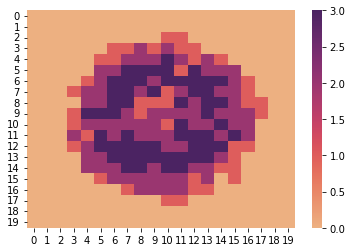

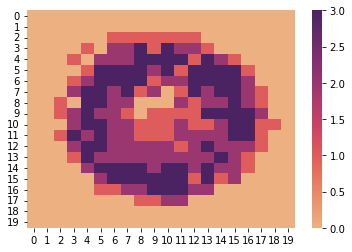

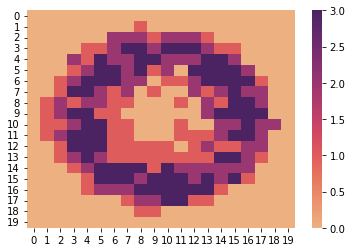

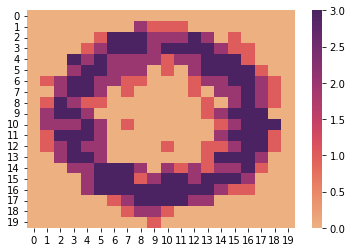

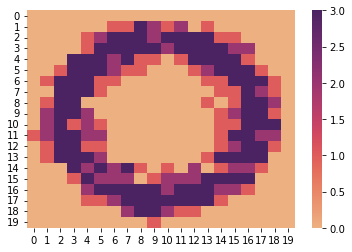

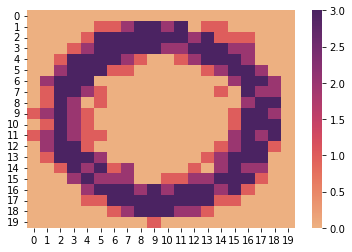

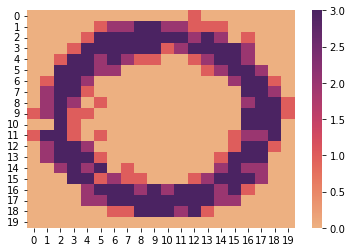

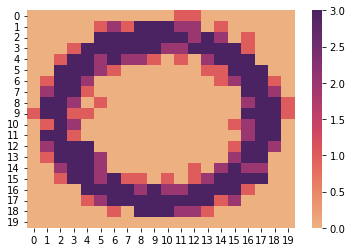

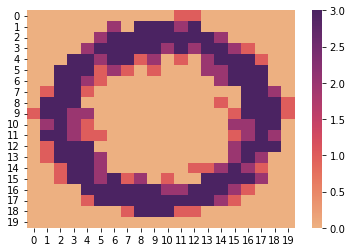

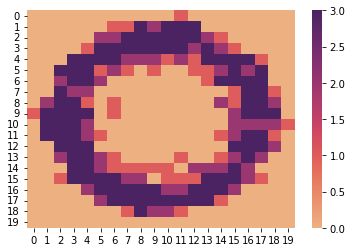

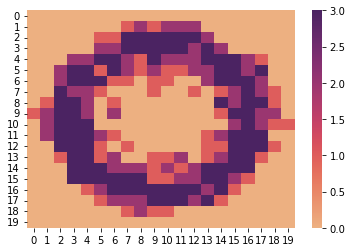

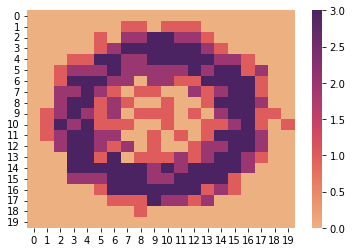

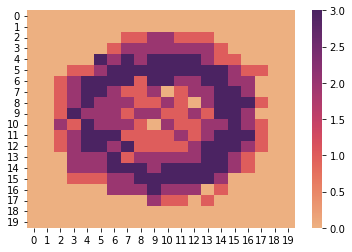

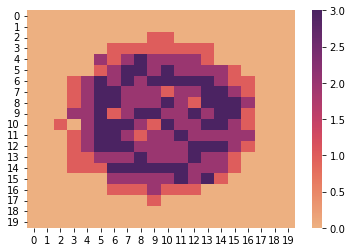

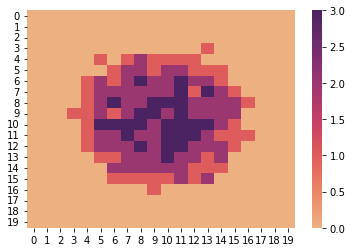

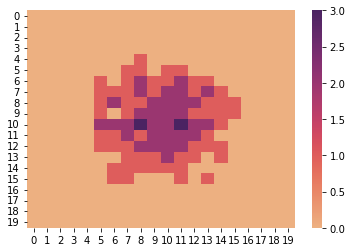

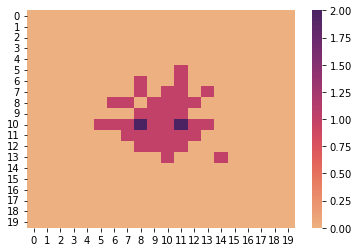

In [58]:
for i in range(20):
    sns.heatmap(cell[:,max(0,i-1):min(20,i+2)].sum(axis = 1),cbar = True, cmap = 'flare')
    plt.show()

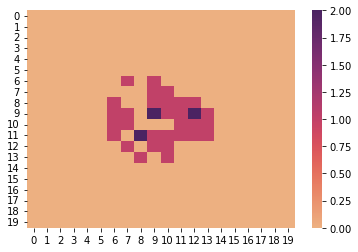

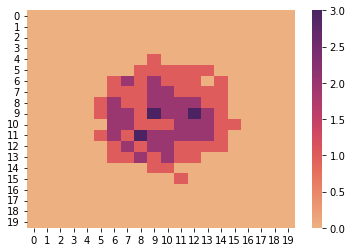

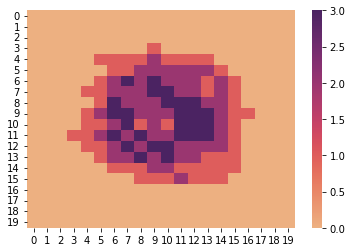

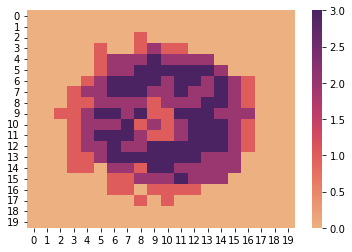

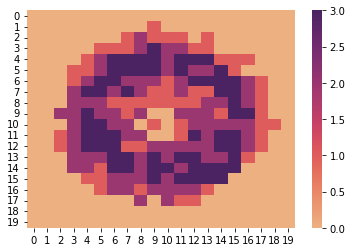

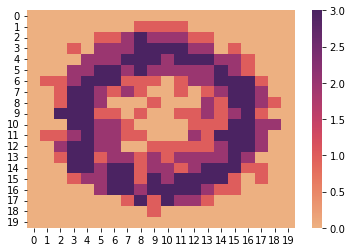

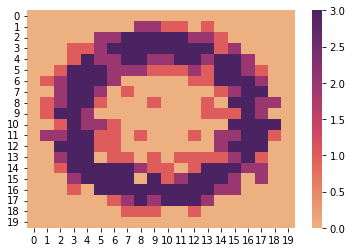

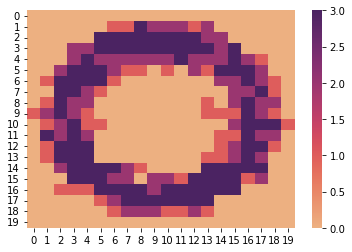

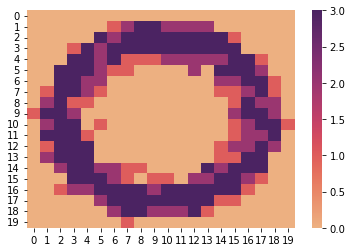

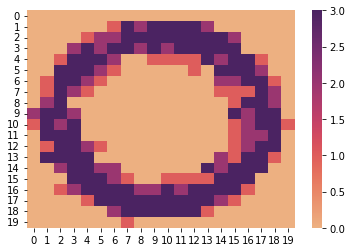

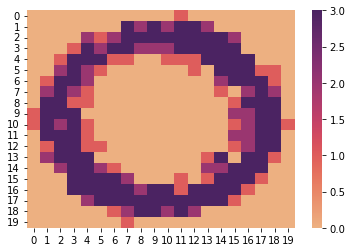

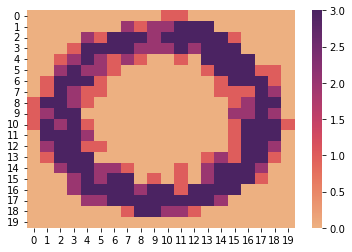

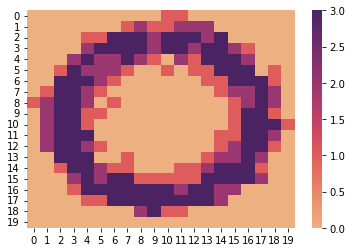

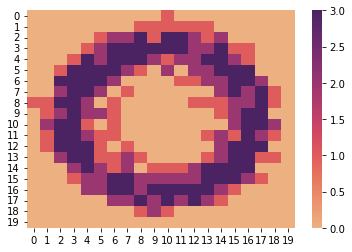

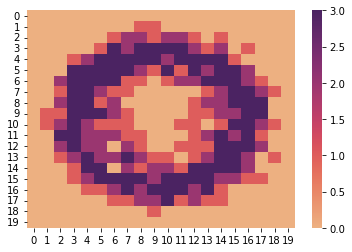

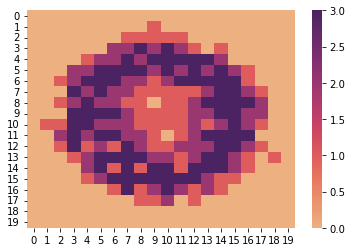

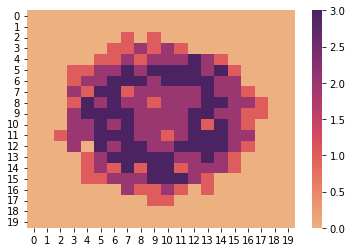

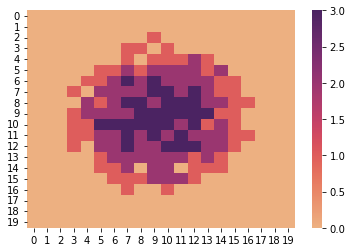

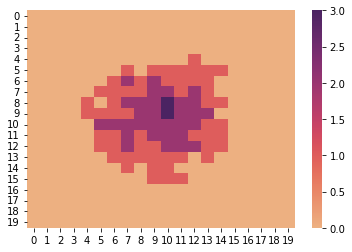

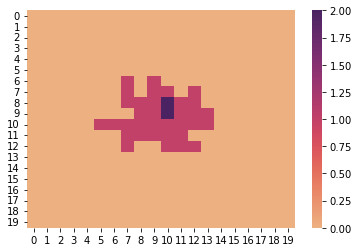

In [59]:
for i in range(20):
    sns.heatmap(cell[:,:,max(0,i-1):min(20,i+2)].sum(axis = 2),cbar = True, cmap = 'flare')
    plt.show()

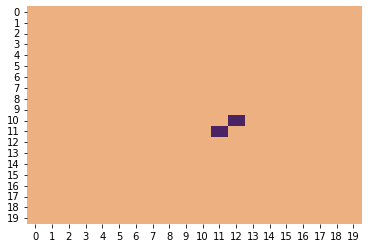

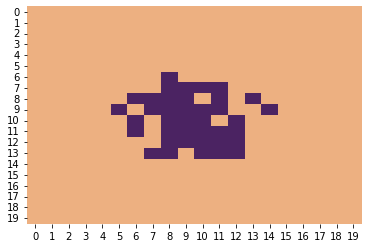

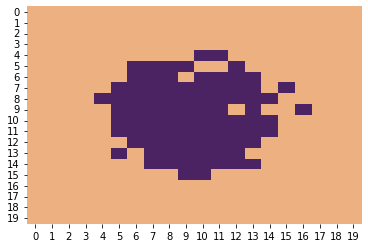

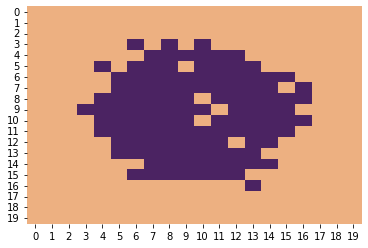

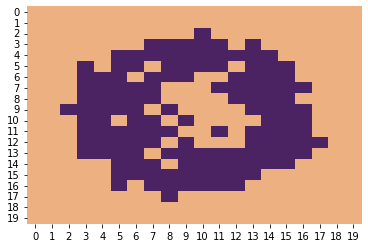

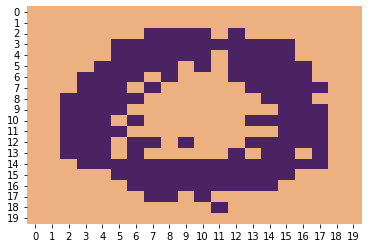

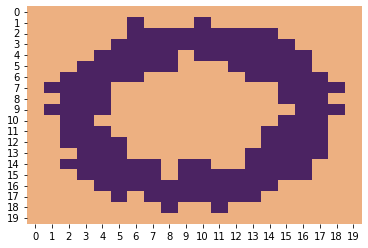

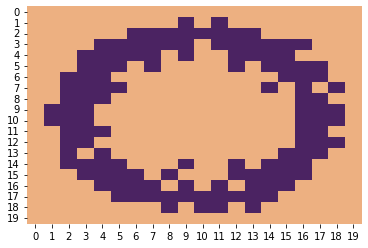

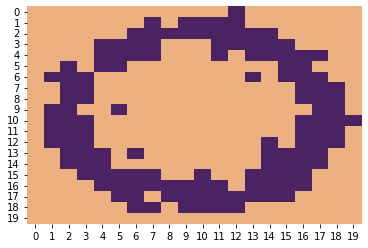

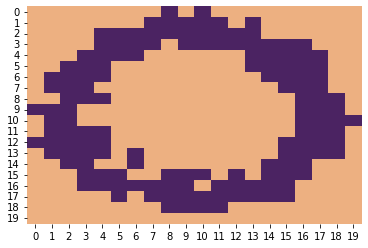

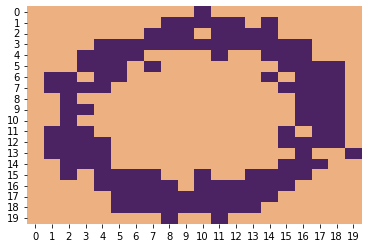

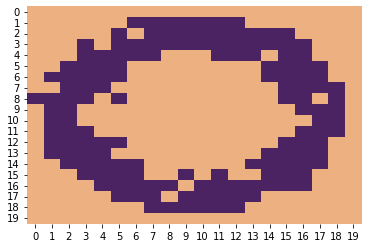

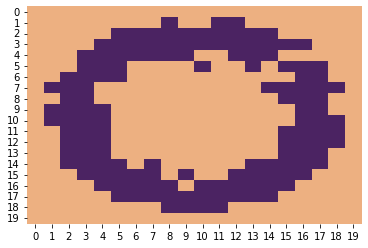

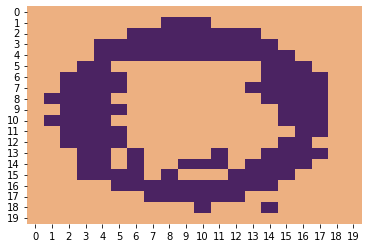

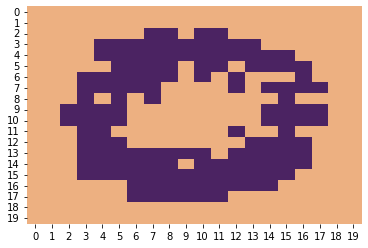

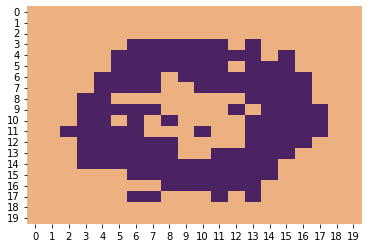

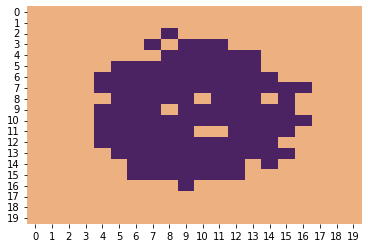

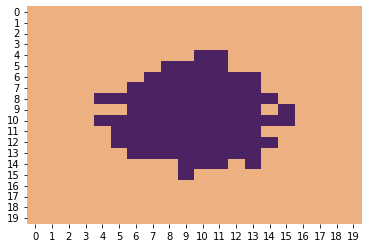

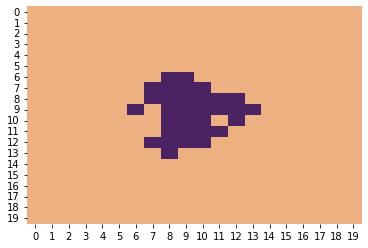

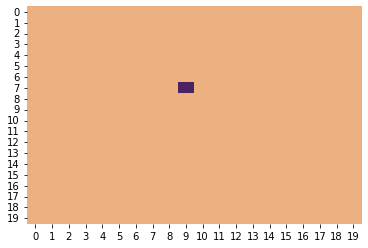

In [61]:
for i in range(20):
    sns.heatmap(cell[i],cbar = False, cmap = 'flare')
    plt.show()